This notebook was designed to be run in Google Colab with a Google Drive account holding the dataset. Running it outside of this environment is untested.


The important places to check this repo, and a list of what all the files do, are all listed in the pdf appendices.   
This notebook is to give an idea of how the project proceeded.


The cells are laid out in the order in which they were done in the dissertation, but it simplifies the process in that they were written across many files which were executed separately and not as a single notebook like here.


While it shows how the data gathering steps are run, these will not work in this notebook because these were actually run in Windows.

All copyrighted data has been removed, including the DATASET folder and spamham folder. The folders are left for reference on folder structure. The uses of these folders are described at the end of the appendices.


In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os, sys
os.chdir('/content/drive/MyDrive/_DISSERTATION/')

print(sys.version)

Mounted at /content/drive
3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]


The cell below installs Python 3.8 for compatibility reasons. When executing the cell below, a text box will appear in the cell output just after the text "...type selection number:" 

Please click it (it will be invisible but should appear when you click it) 
and press the index for the python3.8 option (leftmost in the table ) then enter.

In [2]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo update-alternatives --config python3 
!python3 --version
!sudo apt install python3-pip

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.10   2         auto mode
  1            /usr/bin/python3.10   2         manual mode
  2            /usr/bin/python3.8    1         manual mode

Press <enter> to keep the current choice[*], or type selection number: 2
update-alternatives: using /usr/bin/python3.8 to provide /usr/bin/python3 (python3) in manual mode
Python 3.8.10
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pip-whl python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python-pip-whl python3-pip python3-setuptools python3-wheel
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 2,389 kB of archi

In [3]:
# ------- Pre-requisites
# This cell must be executed to install all the required libraries.
# The set of libraries is very large and specifcally ordered to avoid conflicts.
# This will take around 12 minutes.

# NOTE: the first time you run this script, the linking to Google Drive may cause an error with sh and os.getcwd()
# in the first few lines of output here.
# If this occurs, please wait a few minutes and try again.

try:
  import minerl
  import transformers
  import torch
except:

  print('import failed! installing dependencies...')
  
  if True:
    !pip3 install torch
    !python3 VLPT/requirements_linux.py
    transfo_xl_dir = '/usr/local/lib/python3.8/dist-packages/transformers/models/transfo_xl/'   # <- for colab
    modelling_name = 'modeling_transfo_xl.py'
    os.system( 'cp VLPT/'+modelling_name +' '+ transfo_xl_dir+modelling_name)
    utilities_name = 'modeling_transfo_xl_utilities.py'
    os.system( 'cp VLPT/'+utilities_name +' '+ transfo_xl_dir+utilities_name)

  if True:
    !pip3 install setuptools==65.5.0
    !pip3 install --force-reinstall gym==0.19
    os.system("sudo add-apt-repository -y ppa:openjdk-r/ppa && sudo apt-get update && sudo apt-get install -y openjdk-8-jdk")
    !sudo apt install p7zip
    #!pip install git+https://github.com/minerllabs/minerl@v1.0.0
    !7z x -y '/content/drive/MyDrive/_DISSERTATION/minerl_package.7z' -o'/usr/local/lib/python3.8/dist-packages/' # the setup.py installer via pip kept failing. Copying from a pre-installed copy in Drive was more reliable
    !pip install coloredlogs
    !pip install daemoniker
    !pip install Pyro4
    !pip install flaky
    !pip install --force-reinstall dill>=0.3.1.1
    !pip install --force-reinstall getch>=1.0
    !pip install --force-reinstall imagehash>=4.0.0
    !pip install --force-reinstall inflection>=0.3.1,
    !pip install --force-reinstall typing>=3.6.6
    !pip install --force-reinstall xmltodict==0.12.0
    !pip install --force-reinstall psutil>=5.6.2
    !pip install ipython>=7.5.0 lxml>=4.3.3
    !pip install pyglet
    !pip install numpy==1.23.5

    
    !pip3 install gym3
    !pip3 install attr
    # edit files for datatype compatibility
    !sed -i 's/np.bool/bool/' '/usr/local/lib/python3.8/dist-packages/minerl/herobraine/hero/handlers/agent/observations/lifestats.py'
    !sed -i 's/float32/bfloat16/' '/usr/local/lib/python3.8/dist-packages/transformers/models/transfo_xl/'
    # RESTART RUNTIME BEFORE CONTINUING


# modeling_transfo_xl_16.py is the modified transformerxl model code with bfloat16.
import os
transfo_xl_dir = '/usr/local/lib/python3.8/dist-packages/transformers/models/transfo_xl/'   # <- for colab
modelling_name = 'modeling_transfo_xl_16.py'
os.system( 'cp VLPT/'+modelling_name +' '+ transfo_xl_dir+'modeling_transfo_xl.py')
utilities_name = 'modeling_transfo_xl_utilities_16.py'
os.system( 'cp VLPT/'+utilities_name +' '+ transfo_xl_dir+'modeling_transfo_xl_utilities.py')
!sed -i 's/float32/bfloat16/' '/usr/local/lib/python3.8/dist-packages/transformers/models/transfo_xl/'


!pip install numpy==1.23.5
!pip uninstall --yes attr
!pip install attrs
!pip install matplotlib
!pip install ipykernel

import failed! installing dependencies...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 619.9 MB 24 kB/s 
     |████████████████████████████████| 168.4 MB 70 kB/s 
     |████████████████████████████████| 557.1 MB 10 kB/s 
     |████████████████████████████████| 133 kB 73.1 MB/s 
     |████████████████████████████████| 6.5 MB 54.0 MB/s 
     |████████████████████████████████| 177.1 MB 77 kB/s 
     |████████████████████████████████| 54.6 MB 136 kB/s 
     |████████████████████████████████| 849 kB 71.5 MB/s 
     |████████████████████████████████| 63.2 MB 1.2 MB/s 
     |████████████████████████████████| 102.6 MB 4.8 kB/s 
     |████████████████████████████████| 2.1 MB 31.6 MB/s 
     |████████████████████████████████| 11.8 MB 56.9 MB/s 
     |████████████████████████████████| 98 kB 7.8 MB/s 
     |████████████████████████████████| 317.1 MB 30 kB/s 
     |████████████████████████████████| 21.0 MB

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
sed: couldn't edit /usr/local/lib/python3.8/dist-packages/transformers/models/transfo_xl/: not a regular file
sed: couldn't edit /usr/local/lib/python3.8/dist-packages/transformers/models/transfo_xl/: not a regular file
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: attr 0.3.2
Uninstalling attr-0.3.2:
  Successfully uninstalled attr-0.3.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 10.9 MB/s 
     |████████████████████████████████| 98 kB 8.3 MB/s 
     |████████████████████████████████| 300 kB 76.8 MB/s 
     |████████████████████████████████| 247 kB 76.8 M

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 14.9 MB/s 
     |████████████████████████████████| 103 kB 68.9 MB/s 
     |████████████████████████████████| 93 kB 1.5 MB/s 
     |████████████████████████████████| 1.1 MB 71.9 MB/s 
     |████████████████████████████████| 3.1 MB 62.2 MB/s 
     |████████████████████████████████| 426 kB 57.9 MB/s 


In [ ]:
# ------- Manually label clean Minecraft videos from MineDojo videos list
#  - This step has been run in advance as part of the data collection process so can be skipped.

# This code lets you manually find videos to include in the dataset and is what we settled on for ease of implementation,
# because we could only deal with small dataset sizes anyway, and because it results in very clean datasets which is very important at small scales.
#
# Initially however, we used the method from VPT: 
#
#   1. labelling 8000 randomly scraped Minecraft video frames: 
#           "Data Gathering/video_spamham_collector.py" - For collecting random Minecraft frames using yt_dlp and some keywords
#           "Data Gathering/spamham_samples/*" - Contains scraped random frames(actual images removed for copyright reasons)
#           "Data Gathering/video_spamham_labeller.py" - For going through the selected random frames and labelling them according to the VPT paper criteria
#
#   2. training an SVM classifier to identify clean Minecraft videos from noisy ones
#           "Data Gathering/classifier_train.ipynb"
#
#   3. Using the SVM classifier (pretrained one in "Data Gathering/SVM4") and some manual video title/description filters,
#      and the MineDojo video link list we scan for random Minecraft videos, detect clean ones and save a list of clean/noisy ones.
# 
# From my recollection, this only had an accuracy of around 80-90%, which I decided was not clean enough.

!python3 "Data Gathering/1 - clean_video_finder/manual_link_finding.py"

In [ ]:
# ------- Download the selected clean videos 

!curl -L "https://github.com/yt-dlp/yt-dlp/releases/download/2023.03.04/yt-dlp_linux" -o yt-dlp
!chmod +x yt-dlp
!sudo mv yt-dlp /usr/local/bin/
!yt-dlp --version

!sudo apt install python3-brotli
!pip install pycryptodomex
os.system('sudo apt install yt-dlp')
os.system('sudo apt install ffmpeg')
os.system('sudo apt install brotli')

clean_videos = open('VLPT/FINAL/1 - clean_video_finder/clean_videos','r').read().replace(',','').split('\n')

downloaded_videos = os.listdir('DATASET/train/videos')
for i in range(len(downloaded_videos)):
  downloaded_videos[i] = downloaded_videos[i].split('.')[0]

videos_to_download = sorted(list(set(clean_videos) - set(downloaded_videos)))

print('downloading...')
for id in videos_to_download:
    print(str(   videos_to_download.index(id) / len(videos_to_download)   ))

    full_link = 'https://youtu.be/'+id
    output_filename = 'DATASET/train/videos/'+id+'.mp4'

    command = 'yt-dlp -S res:480,ext:mp4 --recode mp4 '+full_link+' -o '+output_filename

    os.system(command)

In [ ]:
# ------- Transcribe the downloaded videos via Whisper and stable-ts
# - This step has been run in advance as part of the data collection process so can be skipped.
# GPU runtime suggested here to speed this up greatly. This will still take many hours.

!python3 "Data Gathering/3 - transcription/transcribe.py"

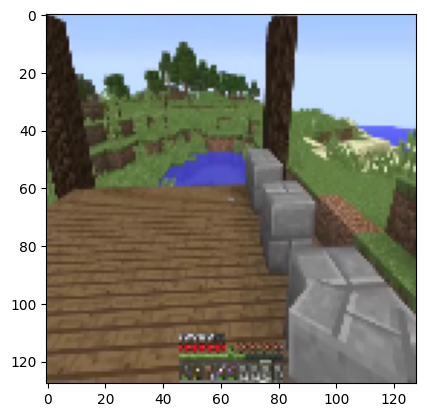

In [ ]:
# ------- Convert & preprocess videos from mp4 to numpy chunks for fast loading
# - This step has been run in advance as part of the data collection process so can be skipped.
# Reading from the raw .mp4 files causes very slow data loading and much GPU idle time.
# Videos are therefore converted to numpy arrays and preprocessed here in a multithreaded fashion.
# Non-GPU colab runtime is suggested for thsi part, since the GPU will not be utilized and this takes many hours.

import os, sys
os.chdir('/content/drive/MyDrive/_DISSERTATION/')

!python3 VLPT/video_numpier2.py

import matplotlib.pyplot as plt
import numpy as np
np.load('/content/drive/MyDrive/_DISSERTATION/DATASET/train/numpy256/')
# shown below is an example of a video frame read from one of the numpy video files. The code to do this has been lost.

In [ ]:
# ---------- IDM labelling: 
# - This step has been run in advance as part of the data collection process so can be skipped.
# this uses the inverse dynamics model provided by OpenAI's VPT paper 
# and github repository (https://github.com/openai/Video-Pre-Training)
# which is used to predict actions for Minecraft videos in order to 
# construct the labels necessary for the behavioural cloning dataset.
# GPU runtime suggested.

import os, sys
os.chdir('/content/drive/MyDrive/_DISSERTATION/')

!python3 VLPT/IDM_labeller.py

USER NOTE:

The first time the below code is run in a session, it will idle for 3 minutes and then fail, due to Google Drive I/O speeds and timeouts. It will run the second time after files are cached.

In [ ]:
# ---------- Train language model 
# This trains only the LM and the cross attention gate before it to do language modelling.
# video input is stil fed to teh preceeding VPT layers, so the LM can learn to condition
# on the VPT layers, and by proxy the environment state

import os, sys
os.chdir('/content/drive/MyDrive/_DISSERTATION/')

!python VLPT/TRAIN_language_cloning.py

Language Cloning: starting data loaders
Filtered videos with. low WPM. remaining : 56%
videos: 219 transcripts: 432 actions: 221 GOT 172 VIDEOS!
video: 18RyeGyCYo0
video: hl1xZoxToIw
video: FQQFg3soqfU
video: di_yiZUPWrg
video: PGyZBFrTaCU
video: H0hG7YGwy1w
video: nEMn2KnjCHY
video: ezIiaiToN3k
video: 1OlzpXrn18Q
video: UAhmBWUDT8c
video: WYChGAkcYzc
video: FxcmN1AoWhs
video: zWDkV6KFyJM
video: 6gHCrxle0Zk
video: ikx3XcbfTv4
video: zJ1eb0oUsWk
video: jo5gE8rPvLc
video: qVNRWOzWMs8
video: H63U5njEZGc
video: i97WHLegLiE
video: mq9f01vnBqo
video: cbyDm6d6F-M
video: 4Lke5QU6XCQ
video: QCHi-7F_Iww
video: PwAkXTl9jxo
video: TJ4atu5E_y8
video: kihie50qzMo
video: Lua_NLvQDr8
video: JlUDIeQdXiw
video: 4O_T0Tw4Dhs
LC: LOADING VLPT
video: 2WqWE9OC9Tg
Loading VLPT CNN and VPT with dtype: torch.bfloat16
W: LOADING IN LM_ONLY MODE! only the following layers will be loaded: [VPT_CNN, VPT_transfo_1, VPT_LM_Xattn, LM.
could not find /content/drive/MyDrive/_DISSERTATION/DATASET/train/numpy256/PwAkXTl9j

USER NOTE:

If the above code was run, new LM weights were saved in TRAINING/LM_ONLY, along with graphs and files loggign training progress.

The next step trains the VPT agent for behavioural cloning conditioned on the language model. In order to use the weights produced above, VLPT/BC_track_hidden.py must be modified to refer to the new langauge model files. There are two lines near the top of the file where this can be done.

The below code may also timeout the first time due to I/O.

In [9]:
# ---------- Train model - VPT ONLY
# this freezes the langauge model and VPT agent layers preceeding it and
# trains the VPT agent layers after the LM on the behavioural cloning dataset,
# as well as teh cross attention layer after the LM and before the 2nd VPT transformer layer.
# The LM receives the appropriate language input, so the VPT layers proceeding it
# can learn to condition on its langauge representations.

import os, sys
os.chdir('/content/drive/MyDrive/_DISSERTATION/')

!python VLPT/TRAIN_behavioural_cloning.py


Streaming output truncated to the last 5000 lines.
BC: TRAIN BATCH DONE! ['KNqPIUoCi54', 'xEMQUBtLc40', '-LMCwEI4uUI', 'Tbwu2_OWYdE', 'YWPk4kGf_zQ', '5Tom6H--RAU', '6V44vVgAaSo', 'Is91sAIQzqU', 'sM25dF2loKE', 'QYOKIgUlFU8', 'kGYIPM1rvjA', 'IxNKeeDTito', 'cFQ4AqJY11A', 'TNQBJCb5lm0', 'JMG9KnFoUlI', '2uZIWJkGg1U'] [97, 86, 20, 285, 130, 168, 153, 287, 204, 187, 6, 51, 121, 104, 81, 217] 1983 ['None'] 5.1155171394348145
!!!token queue overflow!! cropping.. 55 14156 isZ_mtbo1jA
BC: TRAIN BATCH DONE! ['kddS4dqstE8', 'isZ_mtbo1jA', 'PGNMGoKpHaI', 'nzt4l23l3FA', 'LRrTrLQ8n-c', 'TsNKhdv2bH0', 'wotZ5JWBqNI', 'uHkW1q7jlzA', 'CwigSbXioPA', 'pGPrstRmtBQ', 'Ud_2OLNnLHA', 'azLXjaRlGXo', 'vz_w1hIqYeY', 'qpXc9BIjg54', 'Z2dWSvuN36Q', 'KNqPIUoCi54'] [105, 76, 122, 123, 286, 198, 295, 331, 215, 60, 234, 82, 41, 266, 58, 98] 1984 ['None'] 4.588349342346191
BC: TRAIN BATCH DONE! ['xEMQUBtLc40', '-LMCwEI4uUI', 'Tbwu2_OWYdE', 'YWPk4kGf_zQ', '5Tom6H--RAU', '6V44vVgAaSo', 'Is91sAIQzqU', 'sM25dF2loKE', 'QYOKIgU

In [ ]:
# -------- Train model - BOTH
# this is the code used to unfreeze all weights and train the joint model
# on both action and language modelling losses, end to end.

import os, sys
os.chdir('/content/drive/MyDrive/_DISSERTATION/')

!python VLPT/TRAIN_behavioural_language_cloning.py

In [18]:
# ------ EVALUATE MODEL ON TRAINING AND VALIDATION SET WITH FRAME SWAPPING AND MASKING
import os, sys
os.chdir('/content/drive/MyDrive/_DISSERTATION/')

!python VLPT/BLC_evaluate.py


BC: starting data loaders
BC: LOADING VLPT
Loading VLPT CNN and VPT with dtype: torch.bfloat16
W: CUSTOM TRANSFO_XL_UTILITIES.py label usage not like HF docs
Filtered videos with. low WPM. remaining : 56%
videos: 219 transcripts: 432 actions: 221 GOT 172 VIDEOS!
video: 18RyeGyCYo0
video: hl1xZoxToIw
video: FQQFg3soqfU
video: di_yiZUPWrg
video: PGyZBFrTaCU
video: H0hG7YGwy1w
video: nEMn2KnjCHY
video: ezIiaiToN3k
video: 1OlzpXrn18Q
video: UAhmBWUDT8c
video: WYChGAkcYzc
video: FxcmN1AoWhs
video: zWDkV6KFyJM
video: 6gHCrxle0Zk
video: ikx3XcbfTv4
video: zJ1eb0oUsWk
video: jo5gE8rPvLc
video: qVNRWOzWMs8
video: H63U5njEZGc
video: i97WHLegLiE
video: mq9f01vnBqo
video: cbyDm6d6F-M
video: 4Lke5QU6XCQ
video: QCHi-7F_Iww
video: PwAkXTl9jxo
video: TJ4atu5E_y8
video: kihie50qzMo
video: Lua_NLvQDr8
video: JlUDIeQdXiw
video: 4O_T0Tw4Dhs
video: 2WqWE9OC9Tg
BLC_EVAL: batch done! 4.283545970916748 5.3125
                      0.0006866455078125 1.59375
BLC_EVAL: batch done! 4.157916307449341 5.3125
     